# PIPELINE MULTIPLE SIMULATION-K MEANS CLUSTERING

In [1]:
import json
import sys
import os
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
np.set_printoptions(precision=4)
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# Plotting functions

## Plot the positions of the finger

In [2]:
    def plot_pos_fingers(sides_pos,corners_pos,dim,pose,gap):        
        SMALL_SIZE = 8
        MEDIUM_SIZE = 20
        BIGGER_SIZE = 30

        plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
        plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
        plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
        plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
        plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
        plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
        plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

        fig, ax = plt.subplots()
        plt.style.use("ggplot")
        plt.rcParams["figure.figsize"] = (12,8)
        plt.scatter(sides_pos.T[0],sides_pos.T[1],color='b',marker='+',label='sides')
        plt.scatter(corners_pos.T[0],corners_pos.T[1],color='r',marker='+',label='corners')
        plt.ylabel(r'$\theta_R$')
        plt.xlabel(r'$\theta_L$')
        plt.legend(loc='lower right')
        plt.title("Raw data: dim="+str(dim)+'x'+str(dim)+ 'mm ; pose='+str(pose)+'mm ; gap='+str(gap)+'mm',fontsize=20)
        #plt.savefig('raw_data_dim'+str(dim)+'x'+str(dim)+ '_pose_'+str(pose)+'_gap_'+str(gap)+'.png')

## Plot projection on feature vectors

In [3]:
def plot_proj_ld1(lda_X,y,dim,pose,gap):
            SMALL_SIZE = 8
            MEDIUM_SIZE = 20
            BIGGER_SIZE = 30

            plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
            plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
            plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
            plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
            plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
            plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
            plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

            fig, ax = plt.subplots()
            plt.style.use("ggplot")
            plt.rcParams["figure.figsize"] = (12,8)
            ax.axes.yaxis.set_ticks([])
            plt.ylabel('LD1')
            plt.scatter(lda_X[y==0], np.full((len(lda_X[y==0]),),1.0), s=100, color='b', label='corner')
            plt.scatter(lda_X[y==1], np.full((len(lda_X[y==1]),),1.0), s=100, color='r', label='side')
            plt.plot([-1.4,-1.4],[0.9,1.1],'--',color='g')
            plt.ylim(0.9,1.1)
            ax.legend()
            plt.title("1D LDA: dim="+str(dim)+'x'+str(dim)+ 'mm ; pose='+str(pose)+'mm ; gap='+str(gap)+'mm',fontsize=20)
            #plt.savefig('1D_LDA_proj_dim'+str(dim)+'x'+str(dim)+ '_pose_'+str(pose)+'_gap_'+str(gap)+'.png')

## 2-means

In [16]:
def plot_ld1_2means(lda_X,y,y_k2means,dim,pose,gap):
            SMALL_SIZE = 8
            MEDIUM_SIZE = 20
            BIGGER_SIZE = 30

            plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
            plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
            plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
            plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
            plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
            plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
            plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

            fig, ax = plt.subplots()
            plt.style.use("ggplot")
            plt.rcParams["figure.figsize"] = (16,8)
            ax.axes.yaxis.set_ticks([])
            plt.ylabel('LD1 & 2-means clustering')
            plt.scatter(lda_X[y==0], np.full((len(lda_X[y==0]),),2), color='orange', label='corner')
            plt.scatter(lda_X[y==1], np.full((len(lda_X[y==1]),),2), color='purple', label='side')
            plt.scatter(lda_X[y_k2means==0], np.full((len(lda_X[y_k2means==0]),),1.0), c='red', label ='Cluster 1')
            plt.scatter(lda_X[y_k2means==1], np.full((len(lda_X[y_k2means==1]),),1.0), c='blue', label ='Cluster 2')
            plt.scatter(k2means.cluster_centers_[:, 0], np.full((len(k2means.cluster_centers_[:, 0]),),1.0), 
                        s=100, c='yellow', marker='x',label = 'Centroids')
            #plt.plot([-1.4,-1.4],[0,4],'--',color='g')
            plt.ylim(0,4)
            ax.legend()
            plt.title("LD1 & 2-means: dim="+str(dim)+'x'+str(dim)+ 'mm ; pose='+str(pose)+'mm ; gap='+str(gap)+'mm',fontsize=20)
            plt.savefig('LD1_2_means_dim'+str(dim)+'x'+str(dim)+ '_pose_'+str(pose)+'_gap_'+str(gap)+'.png')
            #Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
            
            ##########################################################################################

def plot_raw_2means(sides_pos,corners_pos,angle_array,half_window_size,y_k2means,dim,pose,gap):
            plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
            fig, ax = plt.subplots()
            plt.style.use("ggplot")
            plt.rcParams["figure.figsize"] = (12,8)
            plt.scatter(sides_pos.T[0],sides_pos.T[1]+5,color='purple',marker='+',label='sides')
            plt.scatter(corners_pos.T[0],corners_pos.T[1]+5,color='orange',marker='+',label='corners')
            plt.scatter(angle_array[half_window_size:-half_window_size].T[0][y_k2means == 0], 
                        angle_array[half_window_size:-half_window_size].T[1][y_k2means == 0]-5, 
                        marker='+', c='red', label ='Cluster 1')
            plt.scatter(angle_array[half_window_size:-half_window_size].T[0][y_k2means == 1], 
                        angle_array[half_window_size:-half_window_size].T[1][y_k2means == 1]-5, 
                        marker='+', c='blue', label ='Cluster 2')
            plt.plot(angle_array[half_window_size:-half_window_size].T[0],
                    angle_array[half_window_size:-half_window_size].T[1],
                    color='yellow', label='raw data')
            plt.ylabel(r'$\theta_R$')
            plt.xlabel(r'$\theta_L$')
            plt.legend(loc='lower right')
            plt.title("raw data processed (2-means): dim="+str(dim)+'x'+str(dim)+ 'mm ; pose='+str(pose)+'mm ; gap='+str(gap)+'mm',fontsize=20)
            #plt.savefig('clusters_class_raw_2_means_dim'+str(dim)+'x'+str(dim)+ '_pose_'+str(pose)+'_gap_'+str(gap)+'.png')

## 3-means

In [12]:
def plot_ld1_3means(lda_X,y,y_k3means,dim,pose,gap):
            SMALL_SIZE = 8
            MEDIUM_SIZE = 20
            BIGGER_SIZE = 30

            plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
            plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
            plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
            plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
            plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
            plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
            plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

            fig, ax = plt.subplots()
            plt.style.use("ggplot")
            plt.rcParams["figure.figsize"] = (16,8)
            ax.axes.yaxis.set_ticks([])
            plt.ylabel('LD1 & 3-means clustering')
            plt.scatter(lda_X[y==0], np.full((len(lda_X[y==0]),),2), color='orange', label='corner')
            plt.scatter(lda_X[y==1], np.full((len(lda_X[y==1]),),2), color='purple', label='side')
            plt.scatter(lda_X[y_k3means==0], np.full((len(lda_X[y_k3means==0]),),1.0), c='red', label ='Cluster 1')
            plt.scatter(lda_X[y_k3means==1], np.full((len(lda_X[y_k3means==1]),),1.0), c='blue', label ='Cluster 2')
            plt.scatter(lda_X[y_k3means==2], np.full((len(lda_X[y_k3means==2]),),1.0), c='green', label ='Cluster 3')
            plt.scatter(k3means.cluster_centers_[:, 0], np.full((len(k3means.cluster_centers_[:, 0]),),1.0), 
                        s=100, c='yellow', marker='x',label = 'Centroids')
            #plt.plot([-1.4,-1.4],[0,4],'--',color='g')
            plt.ylim(0,4)
            ax.legend()
            plt.title("LD1 & 3-means: dim="+str(dim)+'x'+str(dim)+ 'mm ; pose='+str(pose)+'mm ; gap='+str(gap)+'mm',fontsize=20)
            plt.savefig('LD1_3_means_dim'+str(dim)+'x'+str(dim)+ '_pose_'+str(pose)+'_gap_'+str(gap)+'.png')

            ##########################################################################################

def plot_raw_3means(sides_pos,corners_pos,angle_array,half_window_size,y_k3means,dim,pose,gap):
            plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes

            fig, ax = plt.subplots()
            plt.style.use("ggplot")
            plt.rcParams["figure.figsize"] = (12,8)
            plt.scatter(sides_pos.T[0],sides_pos.T[1]+5,color='purple',marker='+',label='sides')
            plt.scatter(corners_pos.T[0],corners_pos.T[1]+5,color='orange',marker='+',label='corners')
            plt.scatter(angle_array[half_window_size:-half_window_size].T[0][y_k3means == 0], 
                        angle_array[half_window_size:-half_window_size].T[1][y_k3means == 0]-5, 
                        marker='+', c='red', label ='Cluster 1')
            plt.scatter(angle_array[half_window_size:-half_window_size].T[0][y_k3means == 1], 
                        angle_array[half_window_size:-half_window_size].T[1][y_k3means == 1]-5, 
                        marker='+', c='blue', label ='Cluster 2')
            plt.scatter(angle_array[half_window_size:-half_window_size].T[0][y_k3means == 2], 
                        angle_array[half_window_size:-half_window_size].T[1][y_k3means == 2]-5, 
                        marker='+', c='green', label ='Cluster 3')
            plt.plot(angle_array[half_window_size:-half_window_size].T[0],
                    angle_array[half_window_size:-half_window_size].T[1],
                    color='yellow', label='raw data')
            plt.ylabel(r'$\theta_R$')
            plt.xlabel(r'$\theta_L$')
            plt.legend(loc='lower right')
            plt.title("raw data processed (3-means): dim="+str(dim)+'x'+str(dim)+ 'mm ; pose='+str(pose)+'mm ; gap='+str(gap)+'mm',fontsize=20)
            #plt.savefig('clusters_class_raw_3_means_dim'+str(dim)+'x'+str(dim)+ '_pose_'+str(pose)+'_gap_'+str(gap)+'.png')

# Dataset

The explained variance ratio of lda is :  [1.]
The f1_score of the 2-means is :  0.9090909090909091
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The f1_score of the 3-means for global corner identification is :  0.9090909090909091
The f1_score of the 3-means for each corner identification (micro/or accuracy) is :  0.9322033898305084
{'dim_20_pose_60_gap_42': {'The f1_score 2-means corner identification': 0.9090909090909091, 'The f1_score 3-means global corner identification': 0.9090909090909091, 'The f1_score 3-means each corner identification': 0.9322033898305084}}


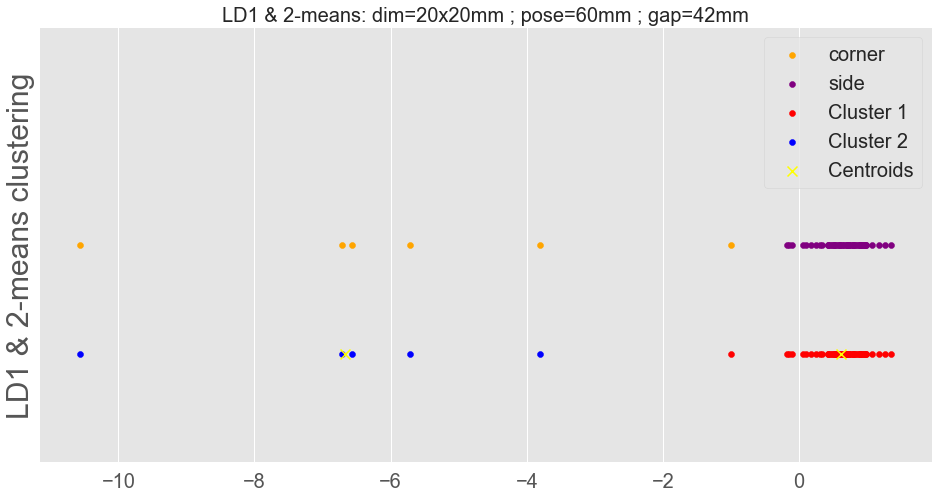

In [17]:
with open('../Simulation/multiple_sqrt_sim_data_pos.json') as f:
    full_data_dict = json.load(f)

poses_drf = [60,]#65,70]
finger_gaps = [42]#[34,42,50]
sqrt_sides = [20]#,25,30]
f1_scores = {}

for pose in poses_drf:
    for gap in finger_gaps:
        for dim in sqrt_sides:
            dict_key = "dim_"+str(dim)+"_pose_"+str(pose)+"_gap_"+str(gap)
            data_dict = full_data_dict[dict_key]

            data_list = [data_dict['LF_motion1'],data_dict['RF_motion1']]
            data_array = np.array(data_list).T
            temp_data_array = np.append(data_array[np.newaxis,0,:,0],data_array[np.newaxis,0,:,1],axis=0)
            data_array = np.append(temp_data_array,data_array[np.newaxis,1,:,1],axis=0).T
            angle_array = data_array[:,:2].astype(float)

            # CREATE A DATAFRAME BY WINDOWING THE RAW AND INCREMENTING THE POSITION OF THE WINDOW
            rows,columns = data_array.shape
            window_size = 5 # needs to be odd
            half_window_size = math.floor(window_size/2)
            data_window = np.zeros((rows-half_window_size*2,window_size*2+1)) #+1 for the class
            corners = []
            sides = []

            for i in range(half_window_size,rows-half_window_size):
                temp_window = np.append(data_array[i-half_window_size:half_window_size+i+1,:].T[0],
                                        data_array[i-half_window_size:half_window_size+i+1,:].T[1])
                if 'corner' in data_array[i-half_window_size+1:half_window_size+i+1-1,:].T[2]:
                    # CLASS 2 IS THE CORNER
                    corners += [angle_array[i].tolist()]
                    data_window[i-half_window_size] = np.append(temp_window,np.array([2]))
                else :
                    # CLASS 1 IS THE SIDE
                    sides += [angle_array[i].tolist()]
                    data_window[i-half_window_size] = np.append(temp_window,np.array([1]))

            #print(data_window)
            names = []
            for j in range(window_size):
                names += ["angleLF"+str(j+1)]
            for j in range(window_size):
                names += ["angleRF"+str(j+1)]
            names += ["class"]

            # DATA FRAME PANDAS
            df = pd.DataFrame(data=data_window,columns = names)
            df["class"].replace({1.0: "side", 2.0: "corner"}, inplace=True)
            df.dropna(how='all', inplace=True)
            windows = df[names[:len(names)-1]]
            labels = df[names[-1]]

            corners_pos = np.array(corners)
            sides_pos = np.array(sides)

            df.head()

            ##########################################################################################
            ############################# Plot the positions of the finger ###########################
            ##########################################################################################
            #plot_pos_fingers(sides_pos,corners_pos,dim,pose,gap)
            
            ##########################################################################################
            ############################# LDA with sklearn ###########################
            ##########################################################################################

            # Preparation of the data for LDA
            X = df.iloc[:, 0:-1].values
            le = LabelEncoder()
            y = le.fit_transform(df['class'])

            # Import LDA from sklearn
            lda = LinearDiscriminantAnalysis()
            lda_X = lda.fit_transform(X, y)
            print("The explained variance ratio of lda is : ", lda.explained_variance_ratio_)

            ##########################################################################################
            ############################# Plot projection on feature vectors ###########################
            ##########################################################################################
            #plot_proj_ld1(lda_X,y,dim,pose,gap)
            
            ##########################################################################################
            #################################### K-means #############################################
            ##########################################################################################

            # 2-means clustering 
            k2means = KMeans(n_clusters=2, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
            y_k2means = k2means.fit_predict(lda_X)

            # 3-mens clustering
            k3means = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
            y_k3means = k3means.fit_predict(lda_X)
            
            ##########################################################################################
            plot_ld1_2means(lda_X,y,y_k2means,dim,pose,gap)
            ##########################################################################################
            #plot_raw_2means(sides_pos,corners_pos,angle_array,half_window_size,y_k2means,dim,pose,gap)
            ##########################################################################################
            #plot_ld1_3means(lda_X,y,y_k3means,dim,pose,gap)
            ##########################################################################################
            #plot_raw_3means(sides_pos,corners_pos,angle_array,half_window_size,y_k3means,dim,pose,gap)
            ##########################################################################################
            
            ##########################################################################################
            #################################### F1-score ############################################
            ##########################################################################################

            # we need to change "y" before beca
            y_true = []
            for i in range(y.shape[0]):
                if y[i] == 0:
                    y_true += [1]
                else:
                    y_true += [0]
                    
            f1_score_2means = f1_score(y_true,y_k2means)
            print("The f1_score of the 2-means is : ",f1_score_2means)
            print(y_true)

            # f1-score on just the corner identification
            y_k3_corner = []
            for i in range(len(y_k3means.tolist())):
                if y_k3means[i] == 2:
                    y_k3_corner += [1]
                else :
                    y_k3_corner += [y_k3means[i]]
            y_k3_corner = np.array(y_k3_corner)
            
            f1_score_3means = f1_score(y_true,y_k3_corner)
            print("The f1_score of the 3-means for global corner identification is : ",f1_score_3means)

            # f1-score on the number of corners
            u = 0
            v = 0
            y_true_corners = []
            for i in range(len(y_true)):
                if y_true[i] == 1 and v == 0:
                    y_true_corners += [y_true[i]]
                    u = 1
                elif y_true[i] == 0 and u==1:
                    y_true_corners += [y_true[i]]
                    v = 1
                elif y_true[i] == 1 and v==1:
                    y_true_corners += [2]
                else:
                    y_true_corners += [y_true[i]]
            acc_3means = accuracy_score(y_true_corners,y_k3means)
            print("The f1_score of the 3-means for each corner identification (micro/or accuracy) is : ",
                  acc_3means)
            
            f1_scores[dict_key] = {
                "The f1_score 2-means corner identification" : f1_score_2means,
                "The f1_score 3-means global corner identification" : f1_score_3means,
                "The f1_score 3-means each corner identification" : acc_3means      
            }
            
print(f1_scores)

In [2]:
# !!!!!!!!!!!!! this can wipe out the file !!!!!!!!!!!!
with open("f1_scores_sqrt_dim_w_5.json", 'w') as f:
    indent = 2  # is not needed but makes the file human-readable
    json.dump(f1_scores, f, indent=2)

NameError: name 'f1_scores' is not defined

# Create a table with the result

In [6]:
with open('f1_scores_sqrt_dim_new_w_5.json') as f:
    dict_f1 = json.load(f)

poses_drf = [60,65,70]
finger_gaps = [34,42,50]
sqrt_sides = [20,25,30]

print("\nTABLE 1 \n")
# Print the names of the columns.
print ("{:<12} {:<12} {:<12} {:<12} {:<12} {:<12}".format('DIMENSION', 'POSE', 'GAP', 'F1 2-Means','F1 3-Means','F1 3-Means (each)'))

# print each data item.
for gap in finger_gaps:
    for pose in poses_drf:
        for dim in sqrt_sides:
            dict_key = "dim_"+str(dim)+"_pose_"+str(pose)+"_gap_"+str(gap)
            dict_value = dict_f1[dict_key]
            f1_2means = round(dict_value['The f1_score 2-means corner identification'],3)
            f1_3means_glob = round(dict_value['The f1_score 3-means global corner identification'],3)
            f1_3means_each = round(dict_value['The f1_score 3-means each corner identification'],3)
            print ("{:<12} {:<12} {:<12} {:<12} {:<12} {:<12}".format(dim,pose,gap,pose,f1_2means, f1_3means_glob, f1_3means_each))


print("\nTABLE 2 \n")
# Print the names of the columns.
print ("{:<12} {:<12} {:<12} {:<12} {:<12} {:<12}".format('DIMENSION', 'POSE', 'GAP', 'F1 2-Means','F1 3-Means','F1 3-Means (each)'))

for pose in poses_drf:
    for gap in finger_gaps:
        for dim in sqrt_sides:
            dict_key = "dim_"+str(dim)+"_pose_"+str(pose)+"_gap_"+str(gap)
            dict_value = dict_f1[dict_key]
            f1_2means = round(dict_value['The f1_score 2-means corner identification'],3)
            f1_3means_glob = round(dict_value['The f1_score 3-means global corner identification'],3)
            f1_3means_each = round(dict_value['The f1_score 3-means each corner identification'],3)
            print ("{:<12} {:<12} {:<12} {:<12} {:<12} {:<12}".format(dim,pose,gap,pose,f1_2means, f1_3means_glob, f1_3means_each))


print("\nTABLE 3 \n")
# Print the names of the columns.
print ("{:<12} {:<12} {:<12} {:<12} {:<12} {:<12}".format('DIMENSION', 'POSE', 'GAP', 'F1 2-Means','F1 3-Means','F1 3-Means (each)'))

for dim in sqrt_sides:
    for gap in finger_gaps:
        for pose in poses_drf:
            dict_key = "dim_"+str(dim)+"_pose_"+str(pose)+"_gap_"+str(gap)
            dict_value = dict_f1[dict_key]
            f1_2means = round(dict_value['The f1_score 2-means corner identification'],3)
            f1_3means_glob = round(dict_value['The f1_score 3-means global corner identification'],3)
            f1_3means_each = round(dict_value['The f1_score 3-means each corner identification'],3)
            print ("{:<12} {:<12} {:<12} {:<12} {:<12} {:<12}".format(dim,pose,gap,pose,f1_2means, f1_3means_glob, f1_3means_each))




TABLE 1 

DIMENSION    POSE         GAP          F1 2-Means   F1 3-Means   F1 3-Means (each)
20           60           34           60           0.909        0.833       
25           60           34           60           0.8          0.909       
30           60           34           60           1.0          1.0         
20           65           34           65           0.923        0.923       
25           65           34           65           1.0          0.857       
30           65           34           65           1.0          1.0         
20           70           34           70           1.0          1.0         
25           70           34           70           1.0          1.0         
30           70           34           70           0.889        1.0         
20           60           42           60           0.909        0.909       
25           60           42           60           0.8          1.0         
30           60           42           60       

# Calculate the average f1-score

In [10]:
with open('f1_scores_sqrt_dim_new_w_5.json') as f:
    dict_f1 = json.load(f)

poses_drf = [60,65,70]
finger_gaps = [34,42,50]
sqrt_sides = [20,25,30]

path = 'f1_scores_sqrt_dim_new_w_5.txt'
f1_file = open(path,'w')

title = 'All the F1-score and accuracy of the squares simulation for window of size 5 \n'
f1_file.write(title)


################ same size ################ 
f1_file.write('\nSAME SIZE \n\n')
print('\nSAME SIZE \n')

sum_f1_score_2means = 0
sum_f1_score_3means_glob = 0
sum_f1_score_3means_each = 0
nb_f1_Scores = 0
for dim in sqrt_sides:
    for gap in finger_gaps:
        for pose in poses_drf:
            dict_key = "dim_"+str(dim)+"_pose_"+str(pose)+"_gap_"+str(gap)
            dict_value = dict_f1[dict_key]
            f1_2means = round(dict_value['The f1_score 2-means corner identification'],3)
            f1_3means_glob = round(dict_value['The f1_score 3-means global corner identification'],3)
            f1_3means_each = round(dict_value['The f1_score 3-means each corner identification'],3)
            sum_f1_score_2means += f1_2means
            sum_f1_score_3means_glob += f1_3means_glob
            sum_f1_score_3means_each += f1_3means_each
            nb_f1_Scores += 1
    print('The average f1-score for squares of dim =',str(dim),' and 2-means clustering : ',sum_f1_score_2means/nb_f1_Scores)
    f1_file.write('The average f1-score for squares of dim ='+str(dim)+' and 2-means clustering : '+str(sum_f1_score_2means/nb_f1_Scores)+'\n')
    print('The average f1-score for squares of dim =',str(dim),' and 3-means clustering : ',sum_f1_score_3means_glob/nb_f1_Scores)
    f1_file.write('The average f1-score for squares of dim ='+str(dim)+' and 3-means clustering : '+str(sum_f1_score_3means_glob/nb_f1_Scores)+'\n')
    print('The average accuracy for squares of dim =',str(dim),' and 3-means clustering : ',sum_f1_score_3means_each/nb_f1_Scores,'\n')
    f1_file.write('The average accuracy for squares of dim ='+str(dim)+' and 3-means clustering : '+str(sum_f1_score_3means_each/nb_f1_Scores)+'\n\n')
    sum_f1_score_2means = 0
    sum_f1_score_3means_glob = 0
    sum_f1_score_3means_each = 0
    nb_f1_Scores = 0
    

################ same pose ################ 
print('\nSAME POSE \n')
f1_file.write('\nSAME POSE \n\n')
sum_f1_score_2means = 0
sum_f1_score_2means_glob = 0
sum_f1_score_2means_each = 0
nb_f1_Scores = 0
for pose in poses_drf:
    for dim in sqrt_sides:
        for gap in finger_gaps:
            dict_key = "dim_"+str(dim)+"_pose_"+str(pose)+"_gap_"+str(gap)
            dict_value = dict_f1[dict_key]
            f1_2means = round(dict_value['The f1_score 2-means corner identification'],3)
            f1_3means_glob = round(dict_value['The f1_score 3-means global corner identification'],3)
            f1_3means_each = round(dict_value['The f1_score 3-means each corner identification'],3)
            sum_f1_score_2means += f1_2means
            sum_f1_score_3means_glob += f1_3means_glob
            sum_f1_score_3means_each += f1_3means_each
            nb_f1_Scores += 1
    print('The average f1-score for squares with pose =',str(pose),' and 2-means clustering : ',sum_f1_score_2means/nb_f1_Scores)
    f1_file.write('The average f1-score for squares with pose ='+str(pose)+' and 2-means clustering : '+str(sum_f1_score_2means/nb_f1_Scores)+'\n')
    print('The average f1-score for squares with pose =',str(pose),' and 3-means clustering : ',sum_f1_score_3means_glob/nb_f1_Scores)
    f1_file.write('The average f1-score for squares with pose ='+str(pose)+' and 3-means clustering : '+str(sum_f1_score_3means_glob/nb_f1_Scores)+'\n')
    print('The average accuracy for squares with pose =',str(pose),' and 3-means clustering : ',sum_f1_score_3means_each/nb_f1_Scores,'\n')
    f1_file.write('The average accuracy for squares with pose ='+str(pose)+' and 3-means clustering : '+str(sum_f1_score_3means_each/nb_f1_Scores)+'\n\n')
    sum_f1_score_2means = 0
    sum_f1_score_3means_glob = 0
    sum_f1_score_3means_each = 0
    nb_f1_Scores = 0


################ same gap ################ 
f1_file.write('\nSAME GAP \n\n')
print('\nSAME GAP \n\n')
sum_f1_score_2means = 0
sum_f1_score_2means_glob = 0
sum_f1_score_2means_each = 0
nb_f1_Scores = 0
for gap in finger_gaps:
    for dim in sqrt_sides:
        for pose in poses_drf:
            dict_key = "dim_"+str(dim)+"_pose_"+str(pose)+"_gap_"+str(gap)
            dict_value = dict_f1[dict_key]
            f1_2means = round(dict_value['The f1_score 2-means corner identification'],3)
            f1_3means_glob = round(dict_value['The f1_score 3-means global corner identification'],3)
            f1_3means_each = round(dict_value['The f1_score 3-means each corner identification'],3)
            sum_f1_score_2means += f1_2means
            sum_f1_score_3means_glob += f1_3means_glob
            sum_f1_score_3means_each += f1_3means_each
            nb_f1_Scores += 1
    print('The average f1-score for squares with fingers gap =',str(gap),' and 2-means clustering : ',sum_f1_score_2means/nb_f1_Scores)
    f1_file.write('The average f1-score for squares with fingers gap ='+str(gap)+' and 2-means clustering : '+str(sum_f1_score_2means/nb_f1_Scores)+'\n')
    print('The average f1-score for squares with fingers gap =',str(gap),' and 3-means clustering : ',sum_f1_score_3means_glob/nb_f1_Scores)
    f1_file.write('The average f1-score for squares with fingers gap ='+str(gap)+' and 3-means clustering : '+str(sum_f1_score_3means_glob/nb_f1_Scores)+'\n')
    print('The average accuracy for squares with fingers gap =',str(gap),' and 3-means clustering : ',sum_f1_score_3means_each/nb_f1_Scores,'\n')
    f1_file.write('The average accuracy for squares with fingers gap ='+str(gap)+' and 3-means clustering : '+str(sum_f1_score_3means_each/nb_f1_Scores)+'\n\n')
    sum_f1_score_2means = 0
    sum_f1_score_3means_glob = 0
    sum_f1_score_3means_each = 0
    nb_f1_Scores = 0

################ total average ################ 
f1_file.write('\nTOTAL AVERAGE \n\n')
print('\nTOTAL AVERAGE \n\n')
sum_f1_score_2means = 0
sum_f1_score_3means_glob = 0
sum_f1_score_3means_each = 0
nb_f1_Scores = 0
for gap in finger_gaps:
    for dim in sqrt_sides:
        for pose in poses_drf:
            dict_key = "dim_"+str(dim)+"_pose_"+str(pose)+"_gap_"+str(gap)
            dict_value = dict_f1[dict_key]
            f1_2means = round(dict_value['The f1_score 2-means corner identification'],3)
            f1_3means_glob = round(dict_value['The f1_score 3-means global corner identification'],3)
            f1_3means_each = round(dict_value['The f1_score 3-means each corner identification'],3)
            sum_f1_score_2means += f1_2means
            sum_f1_score_3means_glob += f1_3means_glob
            sum_f1_score_3means_each += f1_3means_each
            nb_f1_Scores += 1
print('The total average f1-score for squares and 2-means clustering : ',sum_f1_score_2means/nb_f1_Scores)
f1_file.write('The total average f1-score for squares and 2-means clustering : '+str(sum_f1_score_2means/nb_f1_Scores)+'\n')
print('The total average f1-score for squares and 3-means clustering : ',sum_f1_score_3means_glob/nb_f1_Scores)
f1_file.write('The total average f1-score for squares and 3-means clustering : '+str(sum_f1_score_3means_glob/nb_f1_Scores)+'\n')
print('The total average accuracy for squares and 3-means clustering : ',sum_f1_score_3means_each/nb_f1_Scores,'\n')
f1_file.write('The total average accuracy for squares and 3-means clustering : '+str(sum_f1_score_3means_each/nb_f1_Scores)+'\n\n')

f1_file.close()


SAME SIZE 

The average f1-score for squares of dim = 20  and 2-means clustering :  0.9424444444444444
The average f1-score for squares of dim = 20  and 3-means clustering :  0.9196666666666667
The average accuracy for squares of dim = 20  and 3-means clustering :  0.9254444444444445 

The average f1-score for squares of dim = 25  and 2-means clustering :  0.9045555555555553
The average f1-score for squares of dim = 25  and 3-means clustering :  0.8826666666666667
The average accuracy for squares of dim = 25  and 3-means clustering :  0.921888888888889 

The average f1-score for squares of dim = 30  and 2-means clustering :  0.9452222222222222
The average f1-score for squares of dim = 30  and 3-means clustering :  0.9471111111111112
The average accuracy for squares of dim = 30  and 3-means clustering :  0.9346666666666668 


SAME POSE 

The average f1-score for squares with pose = 60  and 2-means clustering :  0.9049999999999999
The average f1-score for squares with pose = 60  and 3-m

- poor performance for the small square for the 3-means as the window of are overlapping 
- for gap 42 problems

